In [0]:
import os

import cv2

import numpy as np

import matplotlib.pyplot as plt

from keras.utils import np_utils

import pandas as pd


from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

# Import tensorflow as the backend for Keras

from keras import backend as K

K.set_image_dim_ordering('tf')

from keras.utils import np_utils

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.optimizers import SGD,RMSprop,adam

from keras.callbacks import TensorBoard

# Import required libraries for cnfusion matrix

from sklearn.metrics import classification_report,confusion_matrix

import itertools
import os
from tqdm import tqdm_notebook, tnrange
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
from glob import glob
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.preprocessing import image

import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from itertools import chain
import numpy as np # linear algebra
from skimage.io import imread
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from PIL import Image
ppi = lambda x: Image.fromarray(preprocess_input(np.array(x).astype(np.float32)))
IMG_SIZE = (512, 512) # slightly smaller than vgg16 normally expects
core_idg = ImageDataGenerator(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.15, 
                              width_shift_range = 0.15, 
                              rotation_range = 5, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range=0.2)
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [0]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'address',
                            y_col = 'type_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 10)
valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'address',
                            y_col = 'type_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 16) # we can use much larger batches for evaluation
# used a fixed dataset for evaluating the algorithm
test_X, test_Y = next(flow_from_dataframe(core_idg, 
                               valid_df, 
                             path_col = 'address',
                            y_col = 'type_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1024)) 

## Ignore next message from keras, values are replaced anyways
Found 1 images belonging to 1 classes.
Reinserting dataframe: 3720 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 597 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 597 images


In [0]:
Y_pred = loaded_model.predict(test_X) 

In [0]:
pre_re=tb_model.predict(test_X)

In [0]:
y_pred = np.argmax(pre_re,axis=1)

In [0]:
y_pred = np.argmax(Y_pred,axis=1)

In [0]:
y_test1 = np.argmax(test_Y,axis=1)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
print('\n',classification_report(y_test1,y_pred ))


               precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.82      0.87      0.84        46
           2       0.84      0.83      0.83        52
           3       0.87      0.96      0.92        28
           4       0.90      0.84      0.87        32
           5       0.88      0.86      0.87        42
           6       0.93      0.68      0.79        38
           7       0.85      0.73      0.78        62
           8       0.83      0.95      0.88        55
           9       0.91      0.76      0.83        42
          10       0.83      0.91      0.87        22
          11       0.72      1.00      0.84        23
          12       0.90      0.86      0.88        43
          13       0.80      0.95      0.87        38
          14       0.96      0.92      0.94        51

   micro avg       0.85      0.85      0.85       597
   macro avg       0.85      0.86      0.85       597
weighted avg       0.86 

In [0]:
for i in range(100,120):
  image = test_X[i]
  plt.axis('off')
  rsize = image.resize((np.array(image.size)/10).astype(int))
  plt.title('real %s : pred %s ' % (dict[y_test1[i]],dict[y_pred[i]]))
  plt.imshow(rsize/255)
  plt.show()#37

In [0]:
test_X.shape

(597, 256, 256, 3)

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import h5py
import glob
import time
from random import shuffle
from collections import Counter

from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam

In [0]:
data_dir_list = os.listdir("/content/gdrive/Team Drives/影像辨識專題-自己小組/圖片檔/確定使用圖片(含LABEL)")
PATH="/content/gdrive/Team Drives/影像辨識專題-自己小組/圖片檔/確定使用圖片(含LABEL)"

In [0]:
jtemp1=np.zeros(539)
jtemp1=pd.DataFrame(jtemp1)
jtemp1.columns=(["address"])

In [0]:
for j in range(0,len(data_dir_list)):
    jtemp1.iloc[j,0]=os.path.join(PATH,data_dir_list[j])

In [0]:
data=jtemp1
data["type"]=None

for id4 in range(0,len(data_dir_list)):
    if data_dir_list[id4][0:2]=="an":
        data["type"][id4]=2
    elif data_dir_list[id4][0:2]=="fo":
        data["type"][id4]=0
    elif data_dir_list[id4][0:2]=="fa":
        data["type"][id4]=1

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
cat_enc = LabelEncoder()
cat_enc.fit(data['type'])

data['type_vec'] = data['type'].map(lambda x: to_categorical(x, len(cat_enc.classes_)))

In [0]:
train_df, valid_df = train_test_split(data, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = data['type'])

In [0]:
train_df.groupby('type').count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'type' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,address,type_vec
type,,
0,154,154
1,154,154
2,154,154


In [0]:
train_df = train_df.groupby(['type']).apply(lambda x: x.sample(154, replace = True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'type' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [0]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'address',
                            y_col = 'type_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 453 images


In [0]:
test_X, test_Y = next(flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'address',
                            y_col = 'type_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32))

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 135 images


In [0]:
from random import shuffle
from collections import Counter

from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [0]:
resnet_weights_path = '/content/gdrive/Team Drives/影像辨識專題-自己小組/model/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:

model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg', weights = resnet_weights_path))
model.add(Dense(3, activation = 'softmax'))
model.layers[0].trainable = False

from tensorflow.python.keras import optimizers
sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])#categorical_accuracy or accuracy


In [0]:
model.fit_generator(train_gen, 
                      steps_per_epoch = 40,
                      validation_data = (test_X, test_Y), 
                      epochs = 20, 
                      )

Epoch 1/20
40/40 [==============================] - 93s 2s/step - loss: 0.8014 - categorical_accuracy: 0.6285 - val_loss: 1.0552 - val_categorical_accuracy: 0.6562
Epoch 2/20
40/40 [==============================] - 83s 2s/step - loss: 0.5790 - categorical_accuracy: 0.7543 - val_loss: 0.7976 - val_categorical_accuracy: 0.7500
Epoch 3/20
40/40 [==============================] - 88s 2s/step - loss: 0.4556 - categorical_accuracy: 0.8494 - val_loss: 0.6977 - val_categorical_accuracy: 0.8125
Epoch 4/20
40/40 [==============================] - 86s 2s/step - loss: 0.4037 - categorical_accuracy: 0.8521 - val_loss: 0.7905 - val_categorical_accuracy: 0.7188
Epoch 5/20
40/40 [==============================] - 86s 2s/step - loss: 0.4010 - categorical_accuracy: 0.8460 - val_loss: 0.7904 - val_categorical_accuracy: 0.8125
Epoch 6/20
40/40 [==============================] - 88s 2s/step - loss: 0.3398 - categorical_accuracy: 0.8833 - val_loss: 0.6626 - val_categorical_accuracy: 0.8125
Epoch 7/20
40/40

In [0]:
pre_re=model.predict(test_X)

In [0]:
y_pred = np.argmax(pre_re,axis=1)
y_test1 = np.argmax(test_Y,axis=1)

In [0]:
print(confusion_matrix(y_test1, y_pred))

[[ 9  0  1]
 [ 3 10  0]
 [ 2  1  6]]


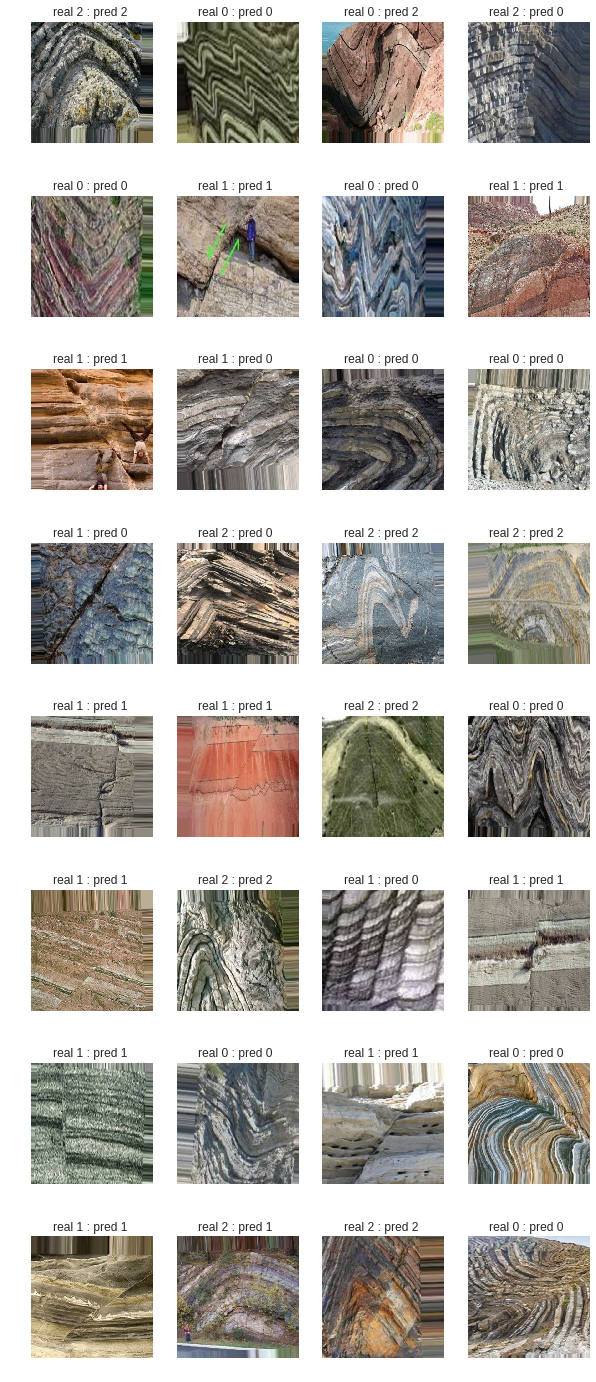

In [0]:
k=0
fig, m_axs = plt.subplots(8, 4, figsize = (10, 25))
for (c_x, c_y, c_ax) in zip(test_X, test_Y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,:]/255,  vmin = -120, vmax = 120)
    
    c_ax.set_title('real %s : pred %s ' % (y_test1[k],y_pred[k]))
    c_ax.axis('off')
    k=k+1

In [0]:
test_X.shape

(32, 512, 512, 3)